### Импорт пакетов и данных

In [763]:
import pandas as pd
import numpy as np

data = pd.read_csv('winequality-red.csv')

### Обзор данных

In [764]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [765]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [766]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Нормализация

In [767]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### PCA

In [768]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)

print(pca.explained_variance_ratio_)

[0.26009731 0.1868235  0.14024331 0.10125174 0.0811053  0.05521602
 0.05152648 0.04215605 0.03427563 0.02732662 0.01501822 0.00495983]


### Построение доли объясненной дисперсии для каждой компоненты

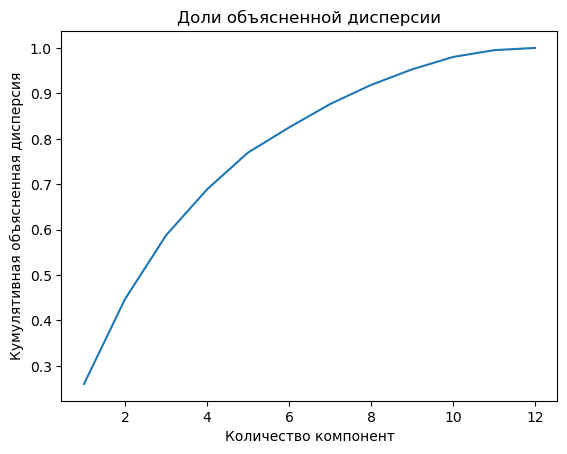

In [769]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.title('Доли объясненной дисперсии')
plt.show()

In [770]:
n_components = 9

In [771]:
pca_final = PCA(n_components=n_components)
pca_final.fit(scaled_data)
pca_data = pca_final.transform(scaled_data)
pca_data

array([[-1.77944158,  1.15730315, -1.38658056, ..., -0.11052758,
         0.04031995, -0.2944202 ],
       [-1.00418467,  2.07183784,  0.00775877, ..., -1.37678974,
        -0.17671393,  0.58734197],
       [-0.91578319,  1.3934342 , -0.69928641, ..., -0.72033805,
        -0.08868663,  0.5464948 ],
       ...,
       [-1.36626511, -0.51756099,  1.25069637, ..., -0.19603884,
        -0.12115434, -0.10756917],
       [-2.36714672,  0.70354479,  0.89948219, ...,  0.12666899,
         0.60740021, -0.37829801],
       [-0.28877628, -1.24084585,  1.21809517, ...,  1.44341443,
        -0.11542162,  0.16519356]])

### Логистическая регрессия на данных PCA

In [772]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Разбивка данных

In [773]:
X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

### Стандартизация данных

In [774]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Применение PCA

In [775]:
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Обучение логистической регрессии на данных PCA

In [776]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

### Предсказание на тестовом наборе и оценка

In [777]:
y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

0.628125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.68      0.84      0.75       120
           6       0.58      0.66      0.62       129
           7       0.65      0.28      0.39        53
           8       0.00      0.00      0.00         4

    accuracy                           0.63       320
   macro avg       0.32      0.30      0.29       320
weighted avg       0.60      0.63      0.60       320



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Решение без PCA

In [778]:
model_wo_pca = LogisticRegression(max_iter=1000)
model_wo_pca.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [779]:
y_pred_wo_pca = model_wo_pca.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_wo_pca)
print(accuracy)
print(classification_report(y_test, y_pred_wo_pca))

0.609375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.66      0.82      0.74       120
           6       0.57      0.64      0.60       129
           7       0.58      0.26      0.36        53
           8       0.00      0.00      0.00         4

    accuracy                           0.61       320
   macro avg       0.30      0.29      0.28       320
weighted avg       0.57      0.61      0.58       320



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Визуализация компонент

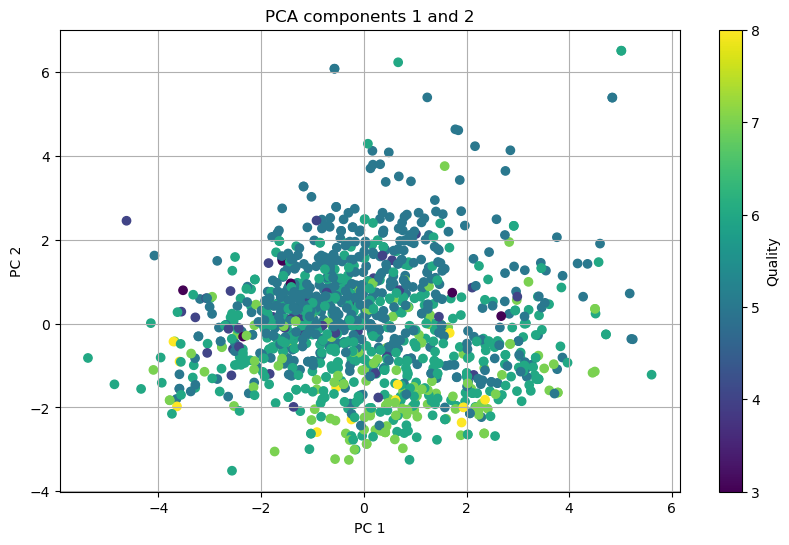

In [780]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA components 1 and 2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Quality')
plt.grid(True)
plt.show()

### Кластеризация KMeans для PCA-данных

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


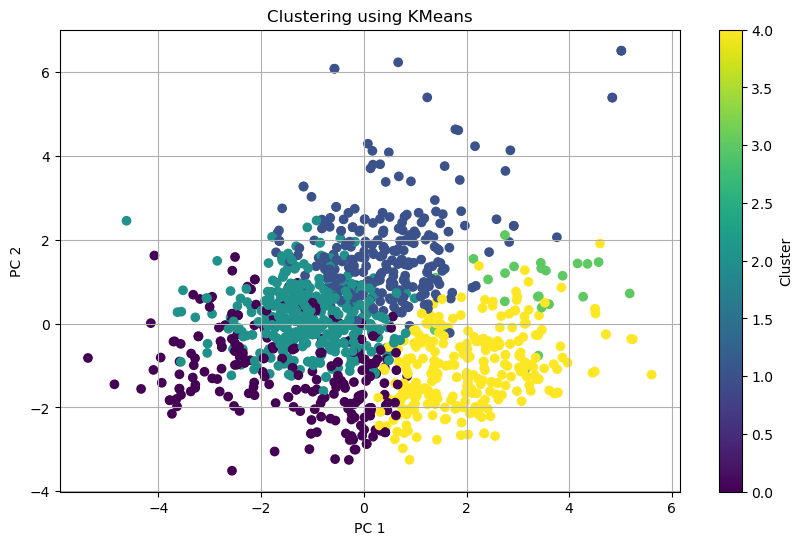

In [782]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=2024)

clusters = kmeans.fit_predict(X_train_pca)

plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering using KMeans')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()